<a href="https://colab.research.google.com/github/AndreLopezRendon/CancerMujeresCO-Analytics/blob/main/EDA_cancer_mama_Cali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos sobre casos confirmados de cáncer de mama en Santiago de Cali

Este notebook presenta un análisis exploratorio de datos (EDA) utilizando el dataset de casos confirmados de cáncer de mama notificados en Santiago de Cali. El objetivo es identificar patrones, tendencias y posibles conclusiones relevantes para la comprensión del evento en la ciudad.

## 1. Carga de datos y revisión inicial

En esta sección se realiza la carga del archivo CSV, la visualización de las primeras filas, la revisión de los tipos de datos y la identificación de valores nulos.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Proyecto ETL y ESTADISTICA/AVANCE PROYECTO/PROYECTO UNIFICADO ETL & IE/Datos/consolidado_cancer_mama_cali.csv'

# Cargar el archivo CSV
df = pd.read_csv(file_path)

# Mostrar las primeras filas
display(df.head())

# Tipos de datos
print(df.dtypes)

# Conteo de valores nulos por columna
print(df.isnull().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,anio_reporte,identificador_unico,fecha_notificacion,ciudad,departamento,edad,sexo,tipo_regimen,etnia,fecha_primera_consulta,inicio_sintomas,fecha_procedimiento,fecha_resultado_biopsia,resultado_biopsia,grado_histologico_tumor,fecha_reporte_web
0,2021,1,2021-08-07,cali,valle,35,femenino,subsidiado,otro,2021-08-02,2021-07-05,2021-04-10,2021-05-24,carcinoma ductal,infiltrante,2022-04-08
1,2021,2,2021-11-13,cali,valle,44,femenino,subsidiado,otro,2021-11-09,2021-01-01,2021-01-07,2021-01-14,carcinoma ductal,infiltrante,2022-04-08
2,2021,3,2021-06-04,cali,valle,55,femenino,subsidiado,otro,2021-06-02,2020-09-12,2021-02-27,2021-03-19,carcinoma ductal,infiltrante,2022-04-08
3,2021,4,2021-06-29,cali,valle,60,femenino,subsidiado,afrocolombiano,2021-06-29,2021-03-01,2021-06-15,2021-06-24,carcinoma ductal,infiltrante,2022-04-08
4,2021,5,2021-03-24,cali,valle,77,femenino,subsidiado,otro,2021-03-24,2020-10-24,2021-03-10,2021-03-15,carcinoma ductal,infiltrante,2022-04-08


anio_reporte                int64
identificador_unico         int64
fecha_notificacion         object
ciudad                     object
departamento               object
edad                        int64
sexo                       object
tipo_regimen               object
etnia                      object
fecha_primera_consulta     object
inicio_sintomas            object
fecha_procedimiento        object
fecha_resultado_biopsia    object
resultado_biopsia          object
grado_histologico_tumor    object
fecha_reporte_web          object
dtype: object
anio_reporte               0
identificador_unico        0
fecha_notificacion         0
ciudad                     0
departamento               0
edad                       0
sexo                       0
tipo_regimen               0
etnia                      0
fecha_primera_consulta     0
inicio_sintomas            0
fecha_procedimiento        0
fecha_resultado_biopsia    0
resultado_biopsia          0
grado_histologico_tumor    0
fecha_r

## 2. Limpieza y transformación de datos

Se realiza la limpieza de datos, incluyendo el manejo de valores nulos, la conversión de columnas de fechas y numéricas, y la estandarización de categorías.

In [ ]:
# Convertir columnas de fechas
fechas = [
    'fecha_notificacion', 'fecha_primera_consulta', 'inicio_sintomas',
    'fecha_procedimiento', 'fecha_resultado_biopsia', 'fecha_reporte_web'
]

for col in fechas:
  df[col] = pd.to_datetime(df[col], errors='coerce')

# Convertir edad a numérico
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')

# Estandarizar categorías (minusculas y sin espacios)
df['sexo'] = df['sexo'].str.strip().str.lower()
df['tipo_regimen'] = df['tipo_regimen'].str.strip().str.lower()
df['etnia'] = df['etnia'].str.strip().str.lower()
df['grado_histologico_tumor'] = df['grado_histologico_tumor'].str.strip().str.lower()
df['resultado_biopsia'] = df['resultado_biopsia'].str.strip().str.lower()

# Revisar valores nulos después de la conversión
print(df.isnull().sum())

# Opcional: Imputar o eliminar filas con valores críticos nulos
df = df.dropna(subset=['edad', 'sexo', 'tipo_regimen', 'resultado_biopsia'])

anio_reporte               0
identificador_unico        0
fecha_notificacion         0
ciudad                     0
departamento               0
edad                       0
sexo                       0
tipo_regimen               0
etnia                      0
fecha_primera_consulta     0
inicio_sintomas            0
fecha_procedimiento        0
fecha_resultado_biopsia    0
resultado_biopsia          0
grado_histologico_tumor    0
fecha_reporte_web          0
dtype: int64


## 3. Análisis Estadístico Descriptivo

Cálculo de estadísticas descriptivas generales para variables numéricas relevantes.

In [ ]:
# Estadísticas descriptivas para variables numéricas
numericas = ['edad']
df[numericas].describe(percentiles=[.25, .5, .75, .9, .95])

,edad
count,1444.000000
mean,59.349030
std,13.386055
min,22.000000
25%,50.000000
50%,60.000000
75%,68.000000
90%,77.000000
95%,83.000000
max,95.000000


## 4. Análisis de distribución de edad

Se calculan estadísticas descriptivas de la edad y se visualiza su distribución mediante histogramas y boxplots.

count    1444.000000
mean       59.349030
std        13.386055
min        22.000000
25%        50.000000
50%        60.000000
75%        68.000000
max        95.000000
Name: edad, dtype: float64


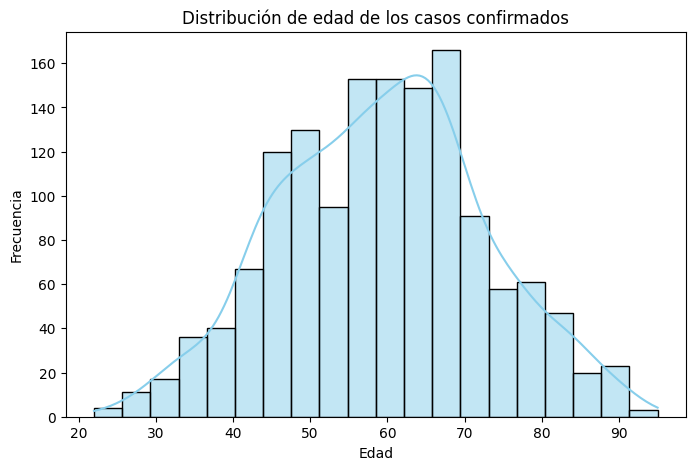

In [ ]:
# Estadísticas descriptivas
print(df['edad'].describe())

# Histograma de edad
plt.figure(figsize=(8,5))
sns.histplot(df['edad'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de edad de los casos confirmados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

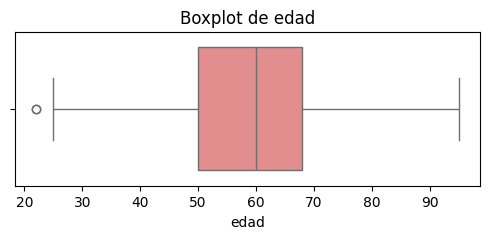

In [ ]:
# Boxplot de edad
plt.figure(figsize=(6,2))
sns.boxplot(x=df['edad'], color='lightcoral')
plt.title('Boxplot de edad')
plt.show()

## 5. Análisis por sexo

Se analiza la proporción de casos por sexo y se visualiza con gráficos de barras.

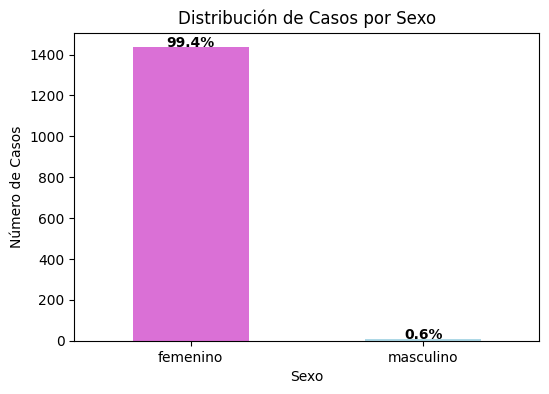

In [ ]:
sexo_counts = df['sexo'].value_counts()

plt.figure(figsize=(6,4))
ax = sexo_counts.plot(kind='bar', color=['orchid', 'lightblue'])
plt.title('Distribución de Casos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Casos')
plt.xticks(rotation=0)
total = sexo_counts.sum()

for i, v in enumerate(sexo_counts):
  pct = v / total * 100
  plt.text(i, v + 2, f'{pct:.1f}%', ha='center', fontweight='bold')

plt.show()

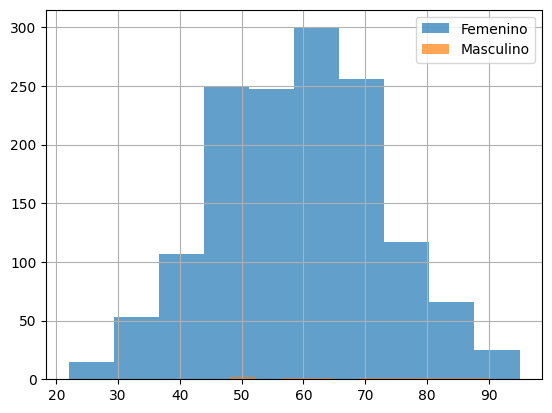

In [ ]:
df[df['sexo'] == "femenino"]["edad"].hist(alpha=0.7)
df[df['sexo'] == "masculino"]["edad"].hist(alpha=0.7)
plt.legend(["Femenino", "Masculino"])
plt.show()

## 6. Análisis por tipo de régimen

Se analiza la distribución de casos por tipo de régimen y se visualiza con gráficos de barras.

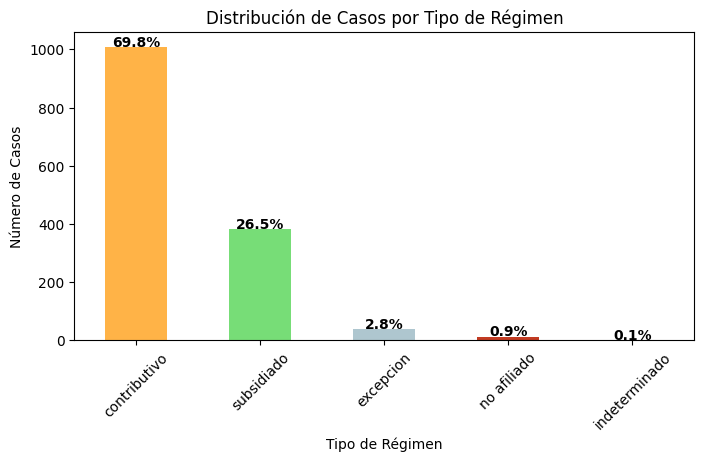

In [ ]:
regimen_counts = df['tipo_regimen'].value_counts()

plt.figure(figsize=(8,4))
colors = ['#FFB347', '#77DD77', '#AEC6CF', '#C23B22', '#F49AC2']
ax = regimen_counts.plot(kind='bar', color=colors[:len(regimen_counts)])
plt.title('Distribución de Casos por Tipo de Régimen')
plt.xlabel('Tipo de Régimen')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
total = regimen_counts.sum()

for i, v in enumerate(regimen_counts):
  pct = v / total * 100
  plt.text(i, v + 2, f'{pct:.1f}%', ha='center', fontweight='bold')

plt.show()

## 7. Análisis por etnia

Se analiza la distribución de casos por etnia y se visualiza con gráficos de barras.

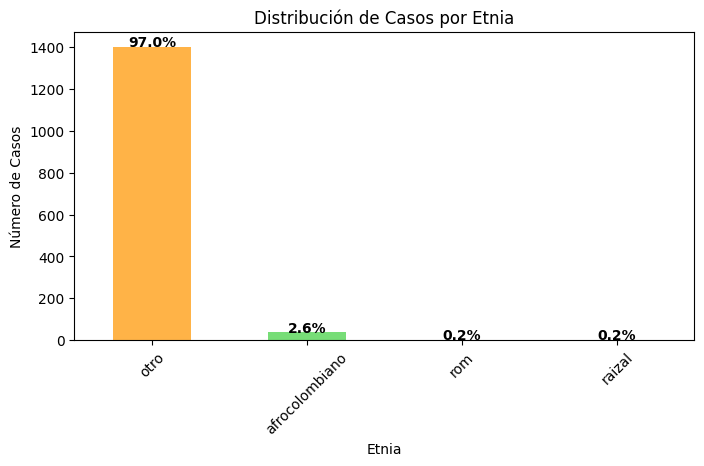

,count
etnia,
otro,96.95
afrocolombiano,2.63
rom,0.21
raizal,0.21


In [ ]:
etnia_counts = df['etnia'].value_counts()
plt.figure(figsize=(8,4))
colors = ['#FFB347', '#77DD77', '#AEC6CF', '#C23B22', '#F49AC2']
ax = etnia_counts.plot(kind='bar', color=colors[:len(etnia_counts)])
plt.title('Distribución de Casos por Etnia')
plt.xlabel('Etnia')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
total = etnia_counts.sum()

for i, v in enumerate(etnia_counts):
  pct = v / total * 100
  plt.text(i, v + 1, f'{pct:.1f}%', ha='center', fontweight='bold')

plt.show()

# Proporción en porcentaje
(etnia_counts / etnia_counts.sum() * 100).round(2)

## 8. Análisis de tipos y grados histológicos del tumor

Se analiza la frecuencia de los diferentes tipos y grados histológicos del tumor y se visualiza con gráficos de barras.

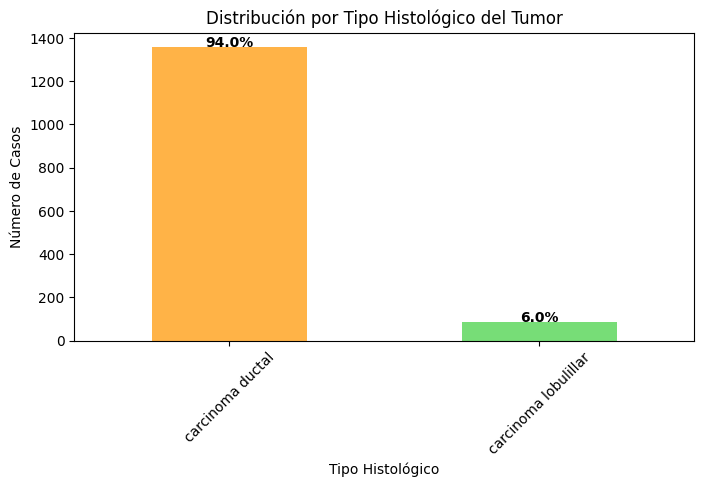

In [ ]:
tipo_counts = df['resultado_biopsia'].value_counts()
plt.figure(figsize=(8,4))
colors = ['#FFB347', '#77DD77', '#AEC6CF', '#C23B22', '#F49AC2']
ax = tipo_counts.plot(kind='bar', color=colors[:len(tipo_counts)])
plt.title('Distribución por Tipo Histológico del Tumor')
plt.xlabel('Tipo Histológico')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
total_tipo = tipo_counts.sum()

for i, v in enumerate(tipo_counts):
  pct = v / total_tipo * 100
  plt.text(i, v + 1, f'{pct:.1f}%', ha='center', fontweight='bold')

plt.show()

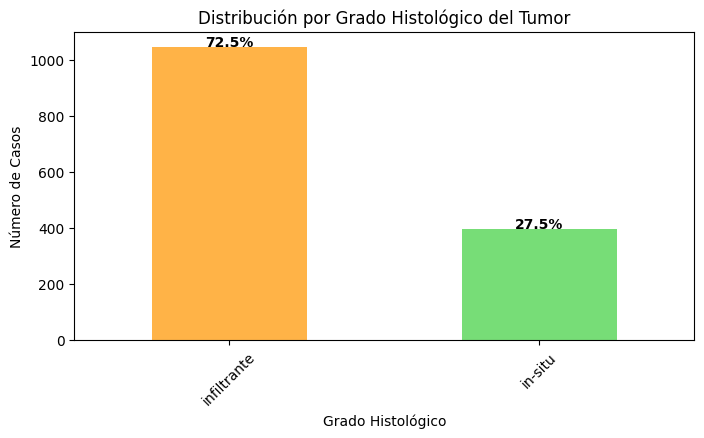

In [ ]:
grado_counts = df['grado_histologico_tumor'].value_counts()
plt.figure(figsize=(8,4))
colors = ['#FFB347', '#77DD77', '#AEC6CF', '#C23B22', '#F49AC2']  # Personaliza los colores según la cantidad de categorías
ax = grado_counts.plot(kind='bar', color=colors[:len(grado_counts)])
plt.title('Distribución por Grado Histológico del Tumor')
plt.xlabel('Grado Histológico')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
total_grado = grado_counts.sum()

for i, v in enumerate(grado_counts):
  pct = v / total_grado * 100
  plt.text(i, v + 1, f'{pct:.1f}%', ha='center', fontweight='bold')

plt.show()

## 9. Análisis de Fechas (notificación, consulta, procedimiento, biopsia)

Se calculan los intervalos de tiempo entre fechas relevantes y se analiza su distribución.

In [ ]:
# Convertir columnas de fechas a tipo datetime
fechas = ['fecha_notificacion', 'fecha_primera_consulta', 'inicio_sintomas', 'fecha_procedimiento', 'fecha_resultado_biopsia', 'fecha_reporte_web']

for col in fechas:
  df[col] = pd.to_datetime(df[col], errors='coerce')

# Ejemplo: tiempo desde inicio de síntomas hasta notificación
df['dias_sintomas_a_notificacion'] = (df['fecha_notificacion'] - df['inicio_sintomas']).dt.days

# Ejemplo: tiempo desde primera consulta a resultado de biopsia
df['dias_consulta_a_biopsia'] = (df['fecha_resultado_biopsia'] - df['fecha_primera_consulta']).dt.days

# Estadísticas descriptivas de los intervalos
df[['dias_sintomas_a_notificacion', 'dias_consulta_a_biopsia']].describe()

,dias_sintomas_a_notificacion,dias_consulta_a_biopsia
count,1444.000000,1444.000000
mean,179.322715,-13.312327
std,418.639710,48.567349
min,0.000000,-405.000000
25%,33.000000,-22.000000
50%,85.500000,-8.000000
75%,193.000000,-1.000000
max,7359.000000,416.000000


## 10. Identificación de Casos Atípicos o Valores Faltantes

Detección y visualización de valores atípicos y datos faltantes en el dataset.

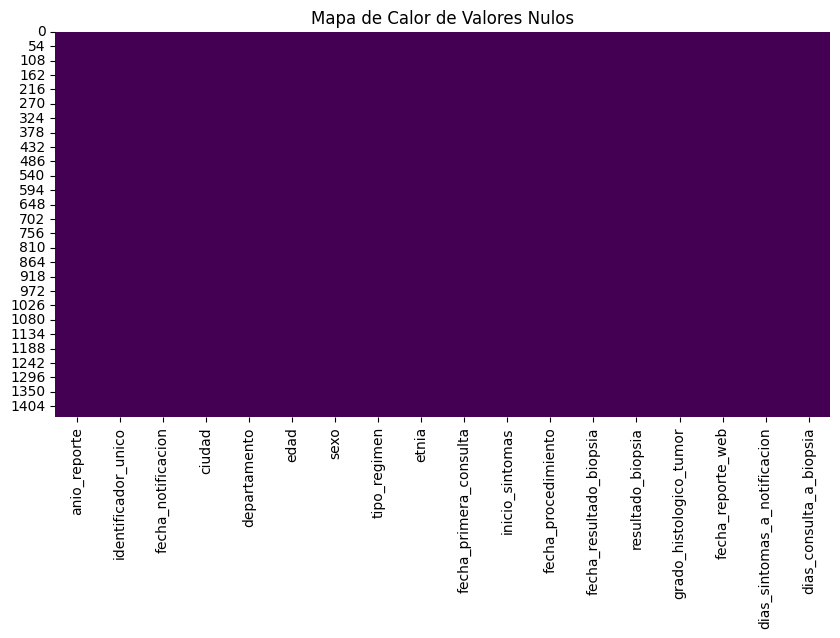

In [ ]:
# Visualización de valores nulos
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos')
plt.show()

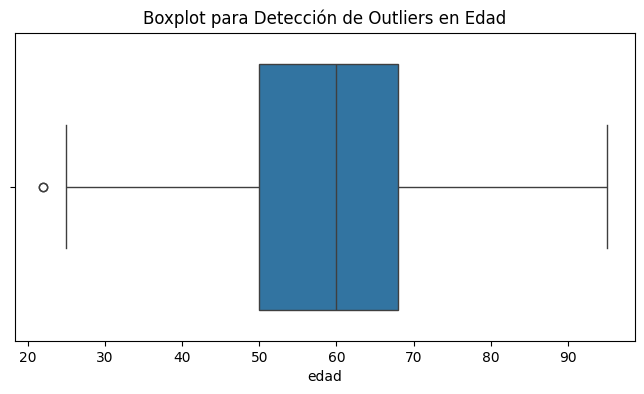

In [ ]:
# Detección de valores atípicos en edad
plt.figure(figsize=(8,4))
sns.boxplot(x=df['edad'])
plt.title('Boxplot para Detección de Outliers en Edad')
plt.show()

In [ ]:
# Casos con valores extremos en intervalos de tiempo
outliers_sintomas = df[df['dias_sintomas_a_notificacion'] > df['dias_sintomas_a_notificacion'].quantile(0.99)]
outliers_consulta = df[df['dias_consulta_a_biopsia'] > df['dias_consulta_a_biopsia'].quantile(0.99)]
print("Casos con tiempo extremo desde síntomas a notificación:", outliers_sintomas.shape[0])
print("Casos con tiempo extremo desde consulta a biopsia:", outliers_consulta.shape[0])

Casos con tiempo extremo desde síntomas a notificación: 15
Casos con tiempo extremo desde consulta a biopsia: 15


# Conclusiones del Análisis Exploratorio

- La mayoría de los casos reportados corresponden a mujeres, con una edad promedio elevada, lo que concuerda con la epidemiología del cáncer de mama.
- El régimen subsidiado es el más frecuente entre los casos notificados, seguido por el contributivo.
- La etnia "otro" predomina, aunque se reportan casos en población afrocolombiana y otras minorías.
- El tipo histológico más común es el carcinoma ductal, principalmente en grado infiltrante.
- Se observan intervalos de tiempo variables entre el inicio de síntomas, consulta y diagnóstico, con algunos casos atípicos que podrían indicar demoras en la atención.
- La presencia de valores nulos y atípicos sugiere oportunidades de mejora en la calidad del registro y seguimiento de los casos.

Este análisis permite identificar patrones relevantes y áreas de oportunidad para la atención y registro de casos de cáncer de mama en Santiago de Cali.

# Modelo de regresión lineal

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

drive.mount('/content/drive')

# Leer el archivo CSV
file_path = '/content/drive/My Drive/Proyecto ETL y ESTADISTICA/AVANCE PROYECTO/PROYECTO UNIFICADO ETL & IE/Datos/consolidado_cancer_mama_cali_fechas.csv'
df = pd.read_csv(file_path)
display(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,anio_reporte,identificador_unico,fecha_notificacion,ciudad,departamento,edad,sexo,tipo_regimen,etnia,fecha_primera_consulta,inicio_sintomas,fecha_procedimiento,fecha_resultado_biopsia,resultado_biopsia,grado_histologico_tumor,fecha_reporte_web,diferencia_dias_biopsia_sintomas
0,2021,1,2021-08-07,cali,valle,35,femenino,subsidiado,otro,2021-08-02,2021-07-05,2021-04-10,2021-05-24,carcinoma ductal,infiltrante,2022-04-08,-42
1,2021,2,2021-11-13,cali,valle,44,femenino,subsidiado,otro,2021-11-09,2021-01-01,2021-01-07,2021-01-14,carcinoma ductal,infiltrante,2022-04-08,13
2,2021,3,2021-06-04,cali,valle,55,femenino,subsidiado,otro,2021-06-02,2020-09-12,2021-02-27,2021-03-19,carcinoma ductal,infiltrante,2022-04-08,188
3,2021,4,2021-06-29,cali,valle,60,femenino,subsidiado,afrocolombiano,2021-06-29,2021-03-01,2021-06-15,2021-06-24,carcinoma ductal,infiltrante,2022-04-08,115
4,2021,5,2021-03-24,cali,valle,77,femenino,subsidiado,otro,2021-03-24,2020-10-24,2021-03-10,2021-03-15,carcinoma ductal,infiltrante,2022-04-08,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,2022,1440,2022-12-27,Cali,Valle,22,femenino,contributivo,otro,2022-12-27,2020-12-01,2022-12-09,2022-12-15,carcinoma ductal,infiltrante,2023-04-15,744
1440,2022,1441,2022-12-28,Cali,Valle,44,femenino,contributivo,otro,2022-12-28,2022-12-28,2022-12-21,2022-12-27,carcinoma ductal,in-situ,2023-04-15,-1
1441,2022,1442,2022-12-28,Cali,Valle,64,femenino,contributivo,otro,2022-12-28,2022-12-01,2022-12-01,2022-12-28,carcinoma ductal,in-situ,2023-04-15,27
1442,2022,1443,2022-12-29,Cali,Valle,70,femenino,contributivo,otro,2022-11-11,2022-08-04,2022-11-11,2022-12-01,carcinoma ductal,infiltrante,2023-04-15,119


In [ ]:
print(df["inicio_sintomas"].dtype)
print(df["fecha_resultado_biopsia"].dtype)

object
object


In [ ]:
df["inicio_sintomas"] = pd.to_datetime(df["inicio_sintomas"], errors="coerce")
df["fecha_resultado_biopsia"] = pd.to_datetime(df["fecha_resultado_biopsia"], errors="coerce")

In [ ]:
print(df["inicio_sintomas"].dtype)
print(df["fecha_resultado_biopsia"].dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
# Codificar la variable categórica grado_histologico_tumor
df['grado_histologico_tumor_num'] = df['grado_histologico_tumor'].astype('category').cat.codes
display(df)

,anio_reporte,identificador_unico,fecha_notificacion,ciudad,departamento,edad,sexo,tipo_regimen,etnia,fecha_primera_consulta,inicio_sintomas,fecha_procedimiento,fecha_resultado_biopsia,resultado_biopsia,grado_histologico_tumor,fecha_reporte_web,diferencia_dias_biopsia_sintomas,grado_histologico_tumor_num
0,2021,1,2021-08-07,cali,valle,35,femenino,subsidiado,otro,2021-08-02,2021-07-05,2021-04-10,2021-05-24,carcinoma ductal,infiltrante,2022-04-08,-42,1
1,2021,2,2021-11-13,cali,valle,44,femenino,subsidiado,otro,2021-11-09,2021-01-01,2021-01-07,2021-01-14,carcinoma ductal,infiltrante,2022-04-08,13,1
2,2021,3,2021-06-04,cali,valle,55,femenino,subsidiado,otro,2021-06-02,2020-09-12,2021-02-27,2021-03-19,carcinoma ductal,infiltrante,2022-04-08,188,1
3,2021,4,2021-06-29,cali,valle,60,femenino,subsidiado,afrocolombiano,2021-06-29,2021-03-01,2021-06-15,2021-06-24,carcinoma ductal,infiltrante,2022-04-08,115,1
4,2021,5,2021-03-24,cali,valle,77,femenino,subsidiado,otro,2021-03-24,2020-10-24,2021-03-10,2021-03-15,carcinoma ductal,infiltrante,2022-04-08,142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,2022,1440,2022-12-27,Cali,Valle,22,femenino,contributivo,otro,2022-12-27,2020-12-01,2022-12-09,2022-12-15,carcinoma ductal,infiltrante,2023-04-15,744,1
1440,2022,1441,2022-12-28,Cali,Valle,44,femenino,contributivo,otro,2022-12-28,2022-12-28,2022-12-21,2022-12-27,carcinoma ductal,in-situ,2023-04-15,-1,0
1441,2022,1442,2022-12-28,Cali,Valle,64,femenino,contributivo,otro,2022-12-28,2022-12-01,2022-12-01,2022-12-28,carcinoma ductal,in-situ,2023-04-15,27,0
1442,2022,1443,2022-12-29,Cali,Valle,70,femenino,contributivo,otro,2022-11-11,2022-08-04,2022-11-11,2022-12-01,carcinoma ductal,infiltrante,2023-04-15,119,1


In [ ]:
df["diferencia_dias_biopsia_sintomas"] = (df["fecha_resultado_biopsia"] - df["inicio_sintomas"]).dt.days
display(df)

,anio_reporte,identificador_unico,fecha_notificacion,ciudad,departamento,edad,sexo,tipo_regimen,etnia,fecha_primera_consulta,inicio_sintomas,fecha_procedimiento,fecha_resultado_biopsia,resultado_biopsia,grado_histologico_tumor,fecha_reporte_web,diferencia_dias_biopsia_sintomas,grado_histologico_tumor_num
0,2021,1,2021-08-07,cali,valle,35,femenino,subsidiado,otro,2021-08-02,2021-07-05,2021-04-10,2021-05-24,carcinoma ductal,infiltrante,2022-04-08,-42,1
1,2021,2,2021-11-13,cali,valle,44,femenino,subsidiado,otro,2021-11-09,2021-01-01,2021-01-07,2021-01-14,carcinoma ductal,infiltrante,2022-04-08,13,1
2,2021,3,2021-06-04,cali,valle,55,femenino,subsidiado,otro,2021-06-02,2020-09-12,2021-02-27,2021-03-19,carcinoma ductal,infiltrante,2022-04-08,188,1
3,2021,4,2021-06-29,cali,valle,60,femenino,subsidiado,afrocolombiano,2021-06-29,2021-03-01,2021-06-15,2021-06-24,carcinoma ductal,infiltrante,2022-04-08,115,1
4,2021,5,2021-03-24,cali,valle,77,femenino,subsidiado,otro,2021-03-24,2020-10-24,2021-03-10,2021-03-15,carcinoma ductal,infiltrante,2022-04-08,142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,2022,1440,2022-12-27,Cali,Valle,22,femenino,contributivo,otro,2022-12-27,2020-12-01,2022-12-09,2022-12-15,carcinoma ductal,infiltrante,2023-04-15,744,1
1440,2022,1441,2022-12-28,Cali,Valle,44,femenino,contributivo,otro,2022-12-28,2022-12-28,2022-12-21,2022-12-27,carcinoma ductal,in-situ,2023-04-15,-1,0
1441,2022,1442,2022-12-28,Cali,Valle,64,femenino,contributivo,otro,2022-12-28,2022-12-01,2022-12-01,2022-12-28,carcinoma ductal,in-situ,2023-04-15,27,0
1442,2022,1443,2022-12-29,Cali,Valle,70,femenino,contributivo,otro,2022-11-11,2022-08-04,2022-11-11,2022-12-01,carcinoma ductal,infiltrante,2023-04-15,119,1


In [ ]:
df["diferencia_dias_biopsia_sintomas"] = (df["fecha_resultado_biopsia"] - df["inicio_sintomas"]).dt.days.abs()
display(df)

,anio_reporte,identificador_unico,fecha_notificacion,ciudad,departamento,edad,sexo,tipo_regimen,etnia,fecha_primera_consulta,inicio_sintomas,fecha_procedimiento,fecha_resultado_biopsia,resultado_biopsia,grado_histologico_tumor,fecha_reporte_web,diferencia_dias_biopsia_sintomas,grado_histologico_tumor_num
0,2021,1,2021-08-07,cali,valle,35,femenino,subsidiado,otro,2021-08-02,2021-07-05,2021-04-10,2021-05-24,carcinoma ductal,infiltrante,2022-04-08,42,1
1,2021,2,2021-11-13,cali,valle,44,femenino,subsidiado,otro,2021-11-09,2021-01-01,2021-01-07,2021-01-14,carcinoma ductal,infiltrante,2022-04-08,13,1
2,2021,3,2021-06-04,cali,valle,55,femenino,subsidiado,otro,2021-06-02,2020-09-12,2021-02-27,2021-03-19,carcinoma ductal,infiltrante,2022-04-08,188,1
3,2021,4,2021-06-29,cali,valle,60,femenino,subsidiado,afrocolombiano,2021-06-29,2021-03-01,2021-06-15,2021-06-24,carcinoma ductal,infiltrante,2022-04-08,115,1
4,2021,5,2021-03-24,cali,valle,77,femenino,subsidiado,otro,2021-03-24,2020-10-24,2021-03-10,2021-03-15,carcinoma ductal,infiltrante,2022-04-08,142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,2022,1440,2022-12-27,Cali,Valle,22,femenino,contributivo,otro,2022-12-27,2020-12-01,2022-12-09,2022-12-15,carcinoma ductal,infiltrante,2023-04-15,744,1
1440,2022,1441,2022-12-28,Cali,Valle,44,femenino,contributivo,otro,2022-12-28,2022-12-28,2022-12-21,2022-12-27,carcinoma ductal,in-situ,2023-04-15,1,0
1441,2022,1442,2022-12-28,Cali,Valle,64,femenino,contributivo,otro,2022-12-28,2022-12-01,2022-12-01,2022-12-28,carcinoma ductal,in-situ,2023-04-15,27,0
1442,2022,1443,2022-12-29,Cali,Valle,70,femenino,contributivo,otro,2022-11-11,2022-08-04,2022-11-11,2022-12-01,carcinoma ductal,infiltrante,2023-04-15,119,1


Mean Squared Error: 0.20565991499083203
R-squared: 0.002501639956487667


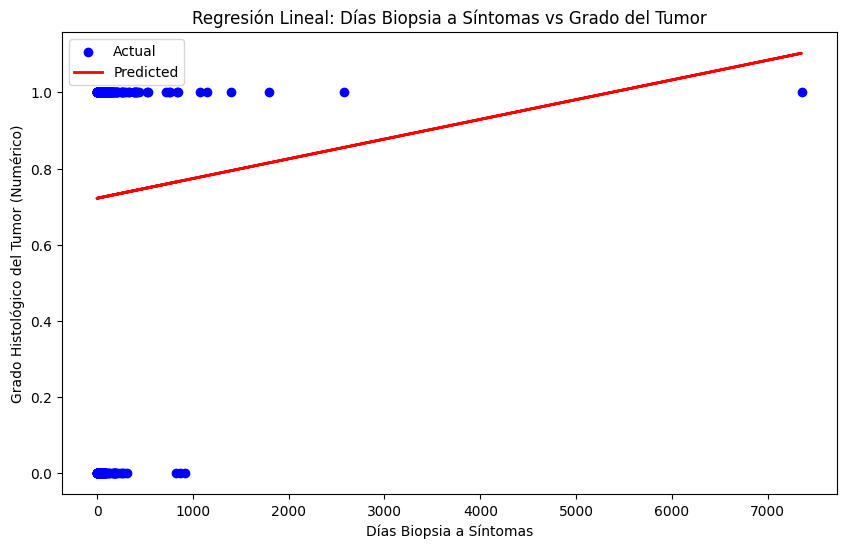

In [ ]:
# Definir las variables independientes (X) y dependiente (y)
X = df[['diferencia_dias_biopsia_sintomas']]
y = df['grado_histologico_tumor_num']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualizar los resultados (opcional)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Regresión Lineal: Días Biopsia a Síntomas vs Grado del Tumor')
plt.xlabel('Días Biopsia a Síntomas')
plt.ylabel('Grado Histológico del Tumor (Numérico)')
plt.legend()
plt.show()